In [2]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
# from collections import defaultdict
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./combined.csv")
df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [4]:
total = df.isnull().sum()
total

text     0
label    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


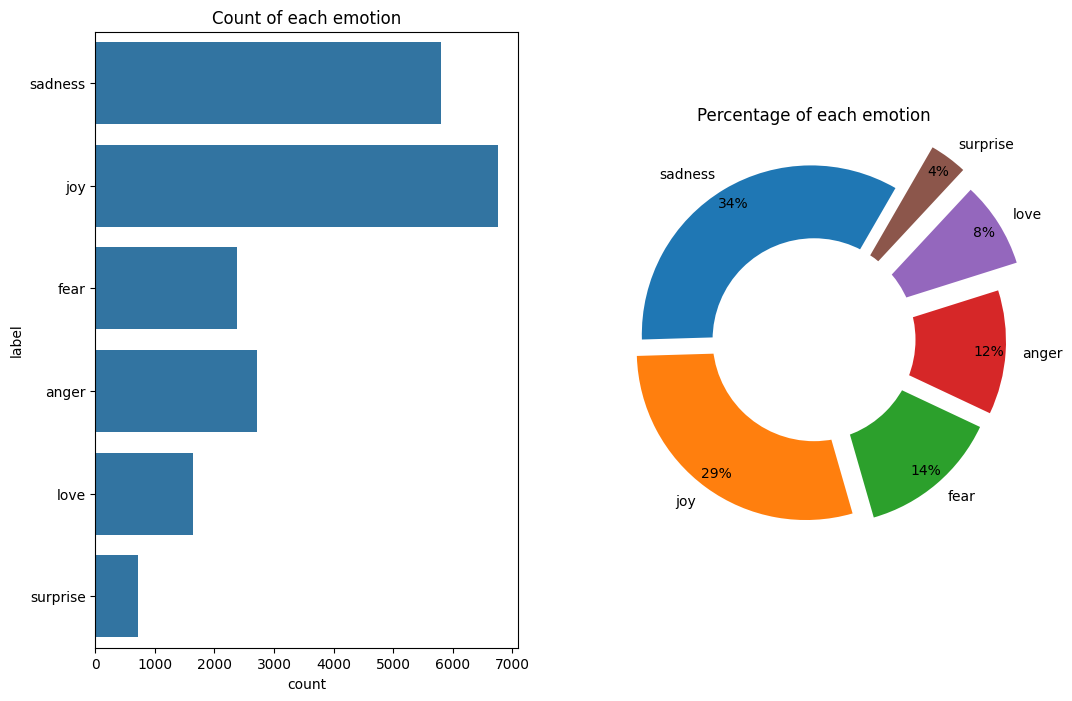

In [6]:
col = 'label'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [7]:
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

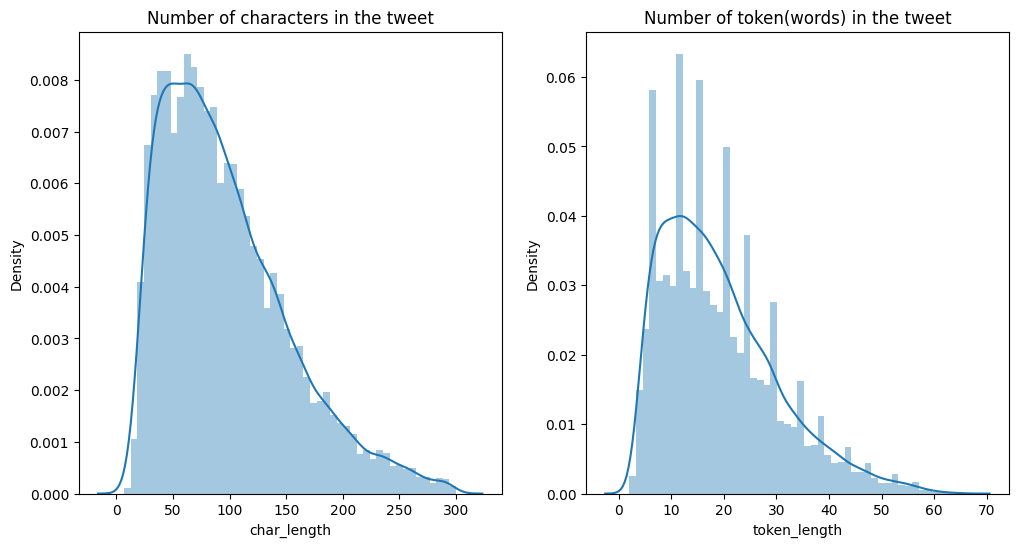

In [8]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

In [9]:
avg_df = df.groupby('label').agg({'char_length':'mean', 'token_length':'mean'})

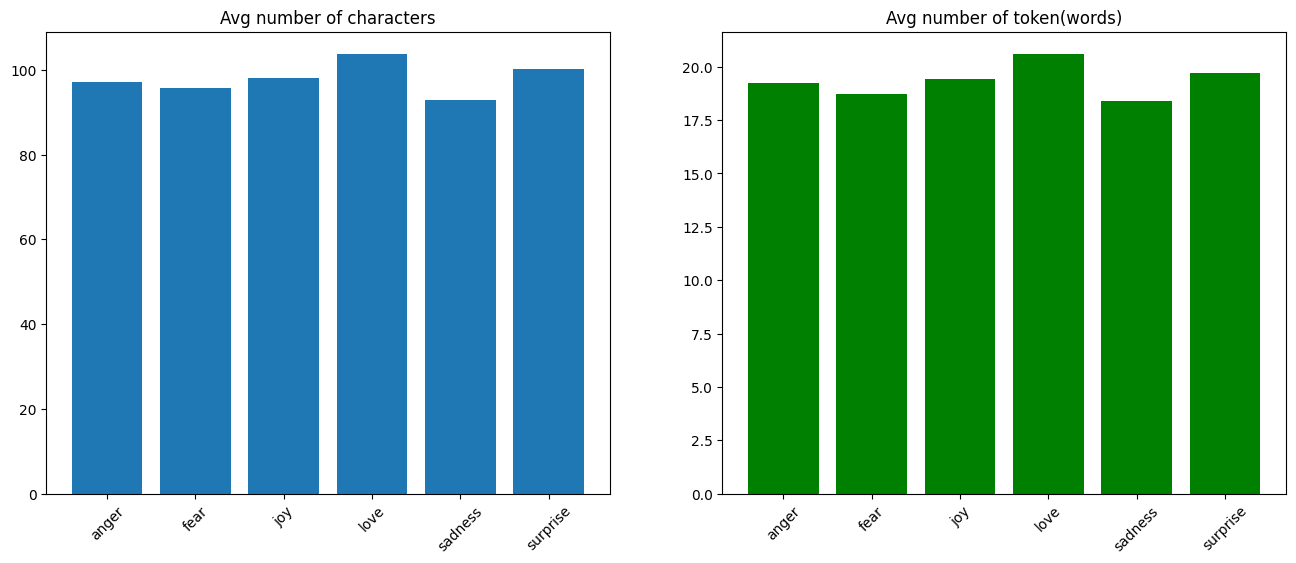

In [10]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

Unlike tweets dataset, all emotions have almost same number of words and tokens in the text

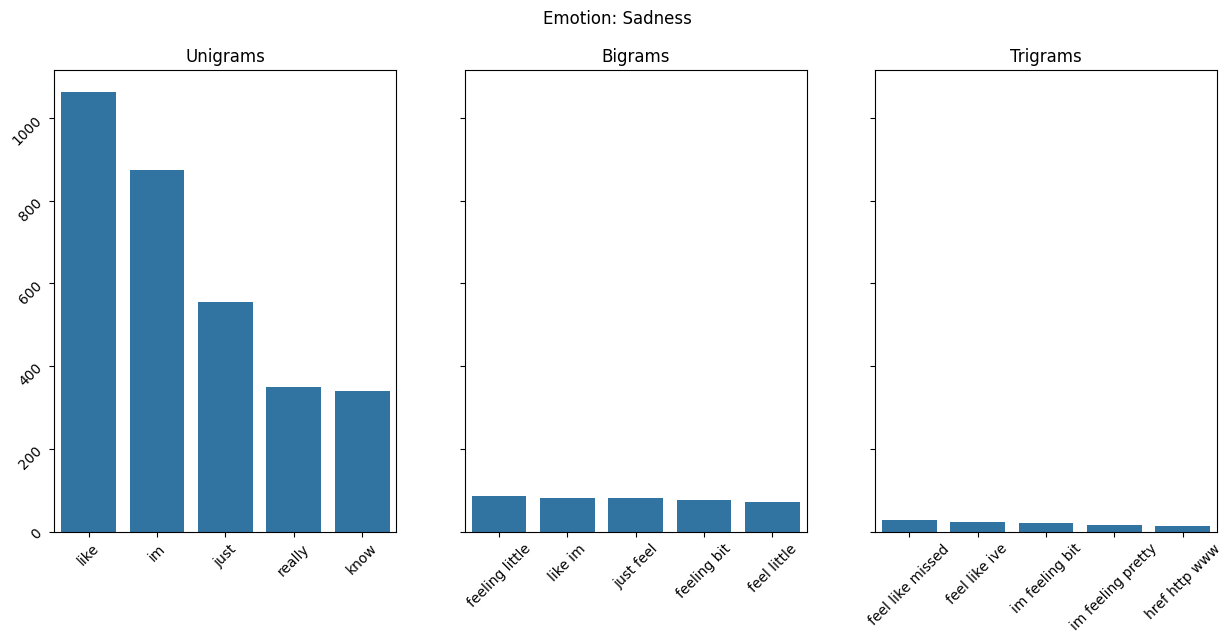

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Creating individual DataFrames for different emotions
sadness = df[df['label'] == 'sadness']['text']
joy = df[df['label'] == 'joy']['text']
love = df[df['label'] == 'love']['text']
anger = df[df['label'] == 'anger']['text']
surprise = df[df['label'] == 'surprise']['text']
fear = df[df['label'] == 'fear']['text']

# Calculating unigrams, bigrams, and trigrams for all given emotions
sad_unigrams = get_top_n_gram(sadness.values, (1, 1), 7)[2:]
joy_unigrams = get_top_n_gram(joy.values, (1, 1), 7)[2:]
love_unigrams = get_top_n_gram(love.values, (1, 1), 7)[2:]
anger_unigrams = get_top_n_gram(anger.values, (1, 1), 7)[2:]
surprise_unigrams = get_top_n_gram(surprise.values, (1, 1), 7)[2:]
fear_unigrams = get_top_n_gram(fear.values, (1, 1), 7)[2:]

sad_bigrams = get_top_n_gram(sadness.values, (2, 2), 7)[2:]
joy_bigrams = get_top_n_gram(joy.values, (2, 2), 7)[2:]
love_bigrams = get_top_n_gram(love.values, (2, 2), 7)[2:]
anger_bigrams = get_top_n_gram(anger.values, (2, 2), 7)[2:]
surprise_bigrams = get_top_n_gram(surprise.values, (2, 2), 7)[2:]
fear_bigrams = get_top_n_gram(fear.values, (2, 2), 7)[2:]

sad_trigrams = get_top_n_gram(sadness.values, (3, 3), 7)[2:]
joy_trigrams = get_top_n_gram(joy.values, (3, 3), 7)[2:]
love_trigrams = get_top_n_gram(love.values, (3, 3), 7)[2:]
anger_trigrams = get_top_n_gram(anger.values, (3, 3), 7)[2:]
surprise_trigrams = get_top_n_gram(surprise.values, (3, 3), 7)[2:]
fear_trigrams = get_top_n_gram(fear.values, (3, 3), 7)[2:]




fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Sadness')

sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)



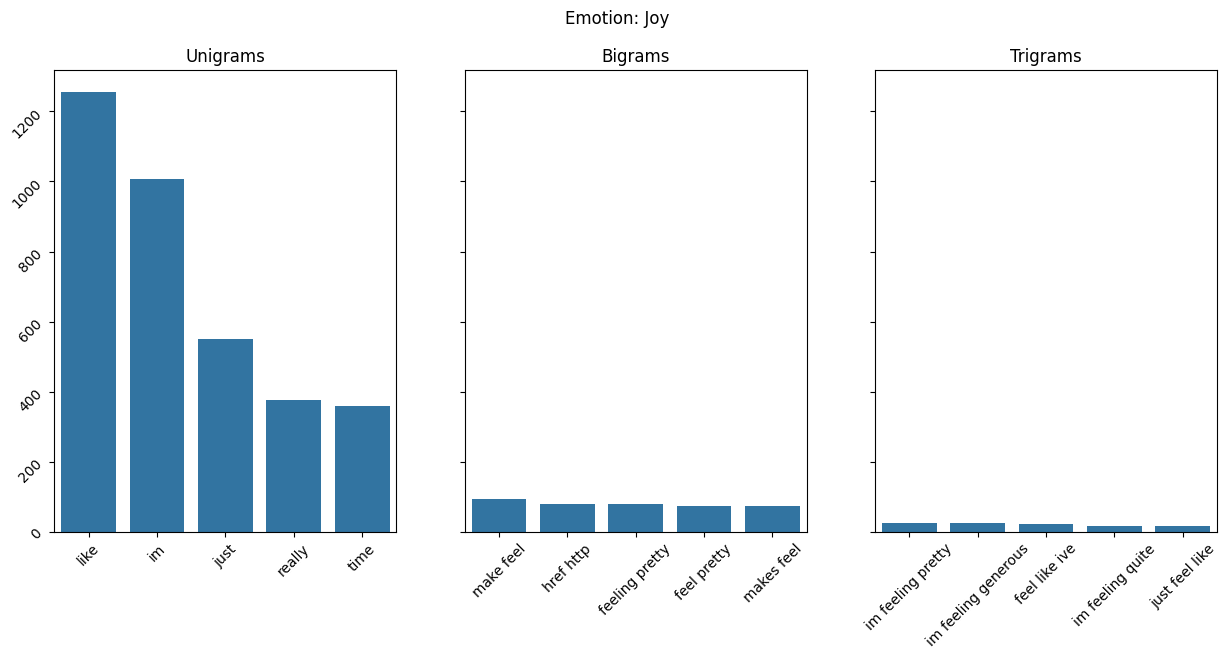

In [15]:

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

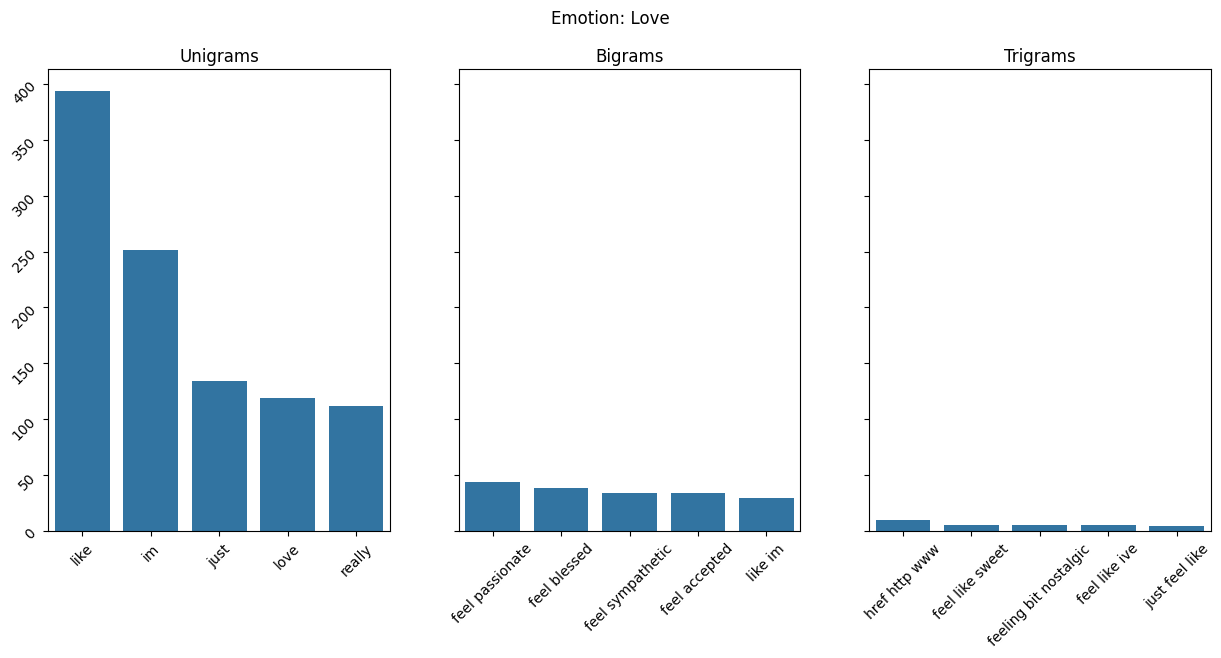

In [14]:

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

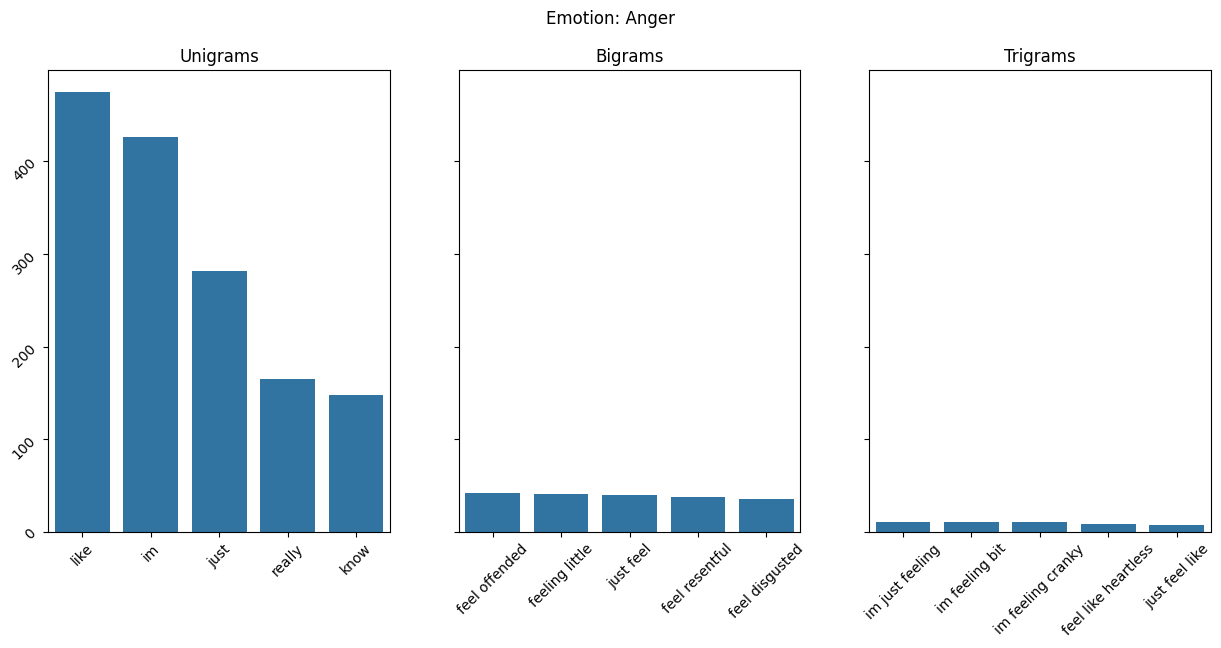

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


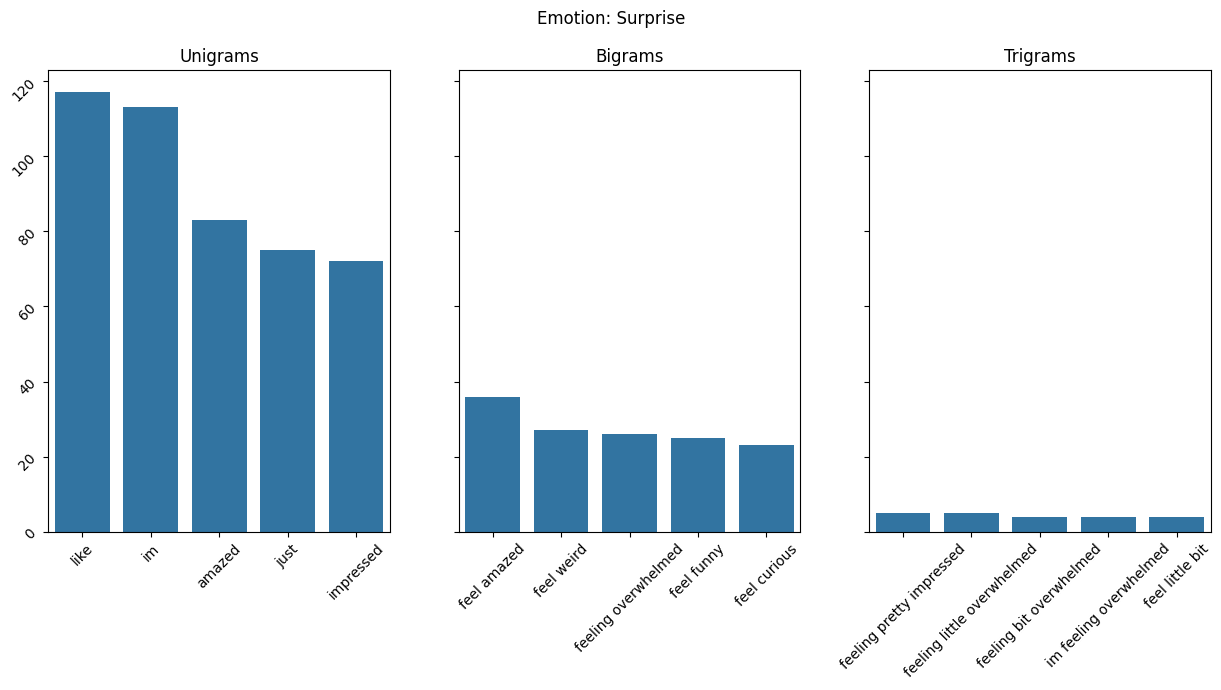

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


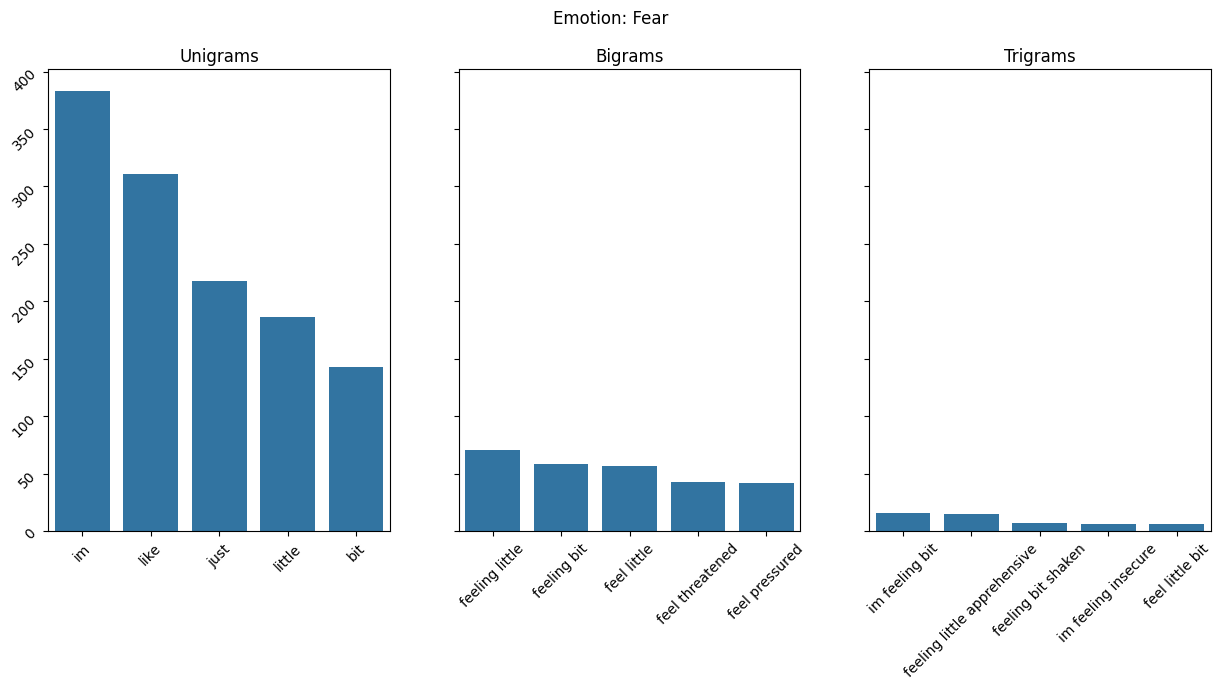

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion: Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()), ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()), ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()), ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)